## Number of Mutant in Moran process

In the following cell, the function Moran_mutant(n,m,r) starts the Moran process with a single mutant among structured population.The structure of the population determines by graph G. One can substitute it with any other graph and change the structure of the population. The size of the population is $n$ and the fitness assign by $r$. The output is the time steps that the number of mutant reaches $m$.  The second function (Mean_Moran_mutant(n,m,r,Q)) runs the Moran_mutant(n,m,r) for $Q$ times and average over outputs. 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx


def Moran_mutant(n,m,r):
    G=nx.complete_graph(n)
    A=nx.adjacency_matrix(G)
    import random
    B=[1]
    for k in range (0,n-1):
        B.append(1)
    l=random.randint(0,n-1)
    B[l]=-1
    t=0
    i=1
    while i<m:
        k=random.random()
        if k<(i*r)/(n-i+i*r):
            s=random.randint(0,n-1)
            j=random.randint(0,n-1)
            while B[s]!=-1:
                s=random.randint(0,n-1)
            if B[s]*B[j]*A[s,j]==-1:
                t=t+1
                i=i+1 
                B[j]=-1
                B[s]=-1
            elif B[s]*B[j]*A[s,j]==1:
                t=t+1
        else:
            w=random.randint(0,n-1)
            q=random.randint(0,n-1)
            while B[w]!=1:
                w=random.randint(0,n-1)
            if B[w]*B[q]*A[w,q]==-1:
                if i==1:
                    t=0
                else:
                    t=t+1
                    i=i-1 
                    B[w]=1
                    B[q]=1
            elif B[q]*B[w]*A[q,w]==1:
                t=t+1      
    return(t) 


def Mean_Moran_mutant(n,m,r,Q):
    h=0
    for x in range(Q):
        h=U(n,m,r)+h
    return(h/Q)

## Number of Mutant in Moran process (Analytical method)
The function Analytical Moran mutant(n,i,r) returns the analytical value of the Morgan Mutant(n,m,r) function but just for the complete graph. for other structure populations, $Mu$ should be modified.

In [16]:
def Analytical_Moran_mutant(n,i,r):
    def Mu(n,i,r):
        return((n-i)*i/((n-i+i*r)*(n-1)) )

    def Ann(n,i,r):
        def S(n,j,r):
            H=(r**n-r**(n-j)+1-r**j)/((r-1)*(r**n-1))
            return(H/Mu(n,j,r))
        t=0
        for k in range (1,i):
            t=t+ S(n,k,r)    
        return(t)

    def Ann1(n,i,r):
        def S(n,i,r):
            return((r**(n-i)-1)/((r-1)*(r**n-1)*(r**i-1)))
        t=0
        for j in range (1,i):
            t=t+(r**(i-j)*(r**j-1)**2)/Mu(n,j,r)   
        return(S(n,i,r)*t)
    return(Ann(n,i,r)-Ann1(n,i,r))

184.57

In [13]:
t=[1]
for j in range(2,n):
    t.append(j)


In [14]:
ys=[1]
for k in range(2,n):
    ys.append(Mean_Moran_mutant(100,k,1.5,100)) 

In [15]:
ds=[1]
for k in range(2,n):
    ds.append(Mean_Moran_mutant(100,k,2,100)) 

In [17]:
ss=[1]
for k in range(2,n):
    ss.append(Mean_Moran_mutant(100,k,3,100)) 

In [19]:
yt=[1]
for k in range(2,n):
    yt.append(Analytical_Moran_mutant(100,k,1.5)) 

dt=[1]
for k in range(2,n):
    dt.append(Analytical_Moran_mutant(100,k,2)) 

st=[1]
for k in range(2,n):
    st.append(Analytical_Moran_mutant(100,k,3)) 

C:\Users\Mahdi\Anaconda3\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "below right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


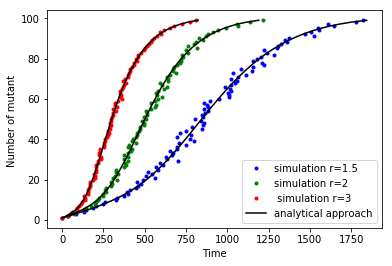

In [22]:
fig,ax=plt.subplots()
ax.plot(ys,t, 'b.',label='simulation r=1.5')
ax.plot(ds,t, 'g.',label='simulation r=2')
ax.plot(ss,t, 'r.',label=' simulation r=3')
ax.plot(yt,t, 'k-',label='analytical approach')
ax.plot(dt,t, 'k-')
ax.plot(st,t, 'k-')
plt.xlabel('Time')
plt.ylabel('Number of mutant ')
legend=ax.legend(loc='below right')